## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/scale/"
os.makedirs(PATH,exist_ok=True)

/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [5]:
bs=32

### Look at data

In [6]:
data = get_data(32,4)

In [7]:
x,y=next(iter(data.trn_dl))

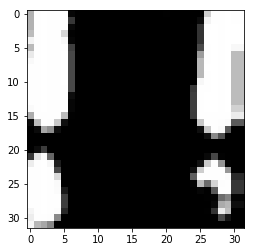

In [8]:
plt.imshow(data.trn_ds.denorm(x)[0]);

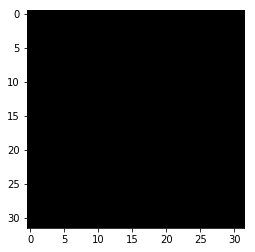

In [9]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [10]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [11]:
data = get_data(8,bs*4)

In [12]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [13]:
lr=1e-2; wd=5e-4

In [14]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy               
    0      7.506883   2.7123712382173975e+22 0.1       



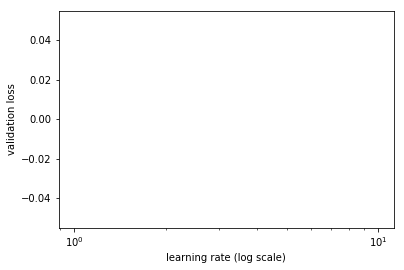

In [15]:
learn.sched.plot()

In [16]:
%time learn.fit(lr, 1)

epoch      trn_loss   val_loss   accuracy               
    0      1.814592   2.621819   0.1       

CPU times: user 5.67 s, sys: 1.96 s, total: 7.64 s
Wall time: 4.68 s


[array([2.62182]), 0.10000000149011612]

In [17]:
learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      0.835684   2.463915   0.1       
    1      0.711653   2.688062   0.2                     



[array([2.68806]), 0.20000000298023224]

In [18]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                
    0      0.486461   2.007299   0.333333  
    1      0.47849    1.214701   0.533333                
    2      0.440114   0.894221   0.633333                
    3      0.429449   0.490828   0.833333                
    4      0.41239    0.403386   0.8                     
    5      0.384214   0.267916   0.933333                
    6      0.356661   0.245275   0.966667                



[array([0.24528]), 0.9666666388511658]

In [19]:
learn.save('8x8_8')

## 16x16

In [20]:
learn.load('8x8_8')

In [21]:
learn.set_data(get_data(16,bs*2))

In [22]:
%time learn.fit(1e-3, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                 
    0      3.051733   3.976146   0.233333  

CPU times: user 4.49 s, sys: 1.38 s, total: 5.87 s
Wall time: 2.83 s


[array([3.97615]), 0.23333333432674408]

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy                 
    0      6.781068   2.7693246598250502e+22 0.1       



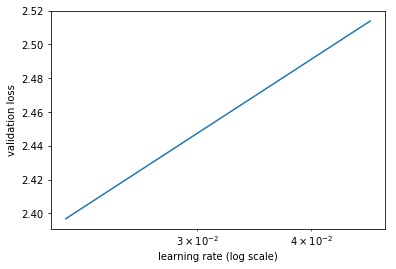

In [25]:
learn.sched.plot()

In [26]:
lr=1e-2

In [27]:
learn.fit(lr, 2, cycle_len=1, wds=wd)

epoch      trn_loss   val_loss   accuracy                 
    0      1.402186   1.824522   0.366667  
    1      1.006799   1.187998   0.566667                 



[array([1.188]), 0.5666666626930237]

In [28]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                  
    0      0.563842   0.901059   0.633333  
    1      0.528998   1.191323   0.6                       
    2      0.458397   0.666876   0.666667                  
    3      0.421597   0.962417   0.6                       
    4      0.396507   0.712793   0.7                       
    5      0.360469   0.588658   0.766667                  
    6      0.326106   0.477914   0.8                       



[array([0.47791]), 0.800000011920929]

In [29]:
learn.save('16x16_8')

## 24x24

In [30]:
learn.load('16x16_8')

In [31]:
learn.set_data(get_data(24,bs))

In [32]:
learn.fit(1e-2, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                 
    0      1.109092   2.978589   0.333333  



[array([2.97859]), 0.3333333432674408]

In [33]:
learn.unfreeze()

In [34]:
learn.fit(lr, 1, cycle_len=1, wds=wd)

epoch      trn_loss   val_loss   accuracy                 
    0      1.056891   1.581705   0.766667  



[array([1.5817]), 0.7666666507720947]

In [35]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                  
    0      0.571647   0.62696    0.733333  
    1      0.683581   0.622154   0.766667                  
    2      0.648279   0.511959   0.7                       
    3      0.747791   0.826269   0.766667                  
    4      0.8859     1.157561   0.7                       
    5      0.696126   0.627081   0.766667                  
    6      0.536753   0.63855    0.766667                  



[array([0.63855]), 0.7666666507720947]

In [36]:
learn.save('24x24_8')

In [39]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds)
accuracy_np(preds,y)

0.7666666666666667

## 32x32

In [40]:
learn.load('24x24_8')

In [41]:
learn.set_data(get_data(32,bs))

In [42]:
learn.fit(1e-2, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                  
    0      0.761573   1.281329   0.533333  



[array([1.28133]), 0.5333333611488342]

In [43]:
learn.unfreeze()

In [44]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                  
    0      0.529821   0.549654   0.733333  
    1      0.561755   1.416243   0.6                       
    2      0.520661   0.507667   0.8                       
    3      0.670755   1.179865   0.666667                  
    4      0.648525   0.500201   0.766667                  
    5      0.588033   0.355084   0.866667                  
    6      0.475161   0.366518   0.866667                  



[array([0.36652]), 0.8666666746139526]

In [45]:
learn.fit(lr, 3, cycle_len=4, wds=wd)

epoch      trn_loss   val_loss   accuracy                  
    0      0.367866   2.302232   0.533333  
    1      0.449961   0.558757   0.766667                  
    2      0.472781   0.256867   0.866667                  
    3      0.398481   0.281578   0.866667                  
    4      0.436195   0.319509   0.766667                  
    5      0.35811    0.218848   0.866667                  
    6      0.313605   0.287216   0.833333                  
    7      0.305291   0.262399   0.9                       
    8      0.356027   0.238199   0.866667                  
    9      0.356516   0.328583   0.9                       
    10     0.443456   0.255379   0.866667                  
    11     0.466438   0.314883   0.833333                  



[array([0.31488]), 0.8333333134651184]

In [49]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds)
accuracy_np(preds,y)

0.8666666666666667

In [50]:
learn.save('32x32_8')

Let's predict a single image

In [ ]:
from fastai.models.cifar10.resnext import resnext29_8_64

data = get_data(32, 32)  # data generator for batch size=64, image size=64x64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

learn = ConvLearner(data, bm)
learn.load("32x32_8")

In [68]:
trn_tfms, val_tfms = tfms_from_model(m,32) # get transformations
im = val_tfms(open_image('./data/scale/test/8/758.jpg'))
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds) # preds are log probabilities of classes

8